# Combine Raw Datasets

In [3]:
import pandas as pd

mapping = {
  "Address": "address",
  "FLAG": "flag",
  "Avg min between sent tnx": "avgTimeBetweenSentTnx",
  "Avg min between received tnx": "avgTimeBetweenRecTnx",
  "Time Diff between first and last (Mins)": "lifetime",
  "Sent tnx": "sentTransactions",
  "Received Tnx": "receivedTransactions",
  "Number of Created Contracts": "createdContracts",
  "Unique Received From Addresses": "numUniqRecAddress",
  "Unique Sent To Addresses": "numUniqSentAddress",
  "min value received": "minValReceived",
  "max value received ": "maxValReceived",
  "avg val received": "avgValReceived",
  "min val sent": "minValSent",
  "max val sent": "maxValSent",
  "avg val sent": "avgValSent",
  "total transactions (including tnx to create contract": "totalTransactions",
  "total Ether sent": "totalEtherSent",
  "total ether received": "totalEtherReceived",
  "total ether sent contracts": "totalEtherSentContracts",
  "total ether balance": "totalEtherBalance",
}

df_1 = pd.read_csv('data/raw/eth_illicit_features.csv')
df_2 = pd.read_csv('data/raw/transaction_dataset.csv') \
    .drop(columns=['Unnamed: 0', 'Index'])

df_1 = df_1[mapping.values()]
df_2 = df_2.rename(columns=mapping)[mapping.values()]
df = pd.concat([df_1, df_2]).drop_duplicates(subset='address').reset_index(drop=True)
df.to_csv('data/processed/kaggle_transaction_dataset.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20302 entries, 0 to 20301
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  20302 non-null  object 
 1   flag                     20302 non-null  int64  
 2   avgTimeBetweenSentTnx    20302 non-null  float64
 3   avgTimeBetweenRecTnx     20302 non-null  float64
 4   lifetime                 20302 non-null  float64
 5   sentTransactions         20302 non-null  int64  
 6   receivedTransactions     20302 non-null  int64  
 7   createdContracts         20302 non-null  int64  
 8   numUniqRecAddress        20302 non-null  int64  
 9   numUniqSentAddress       20302 non-null  int64  
 10  minValReceived           20302 non-null  float64
 11  maxValReceived           20302 non-null  float64
 12  avgValReceived           20302 non-null  float64
 13  minValSent               20302 non-null  float64
 14  maxValSent            

# Exploratory Data Analysis

In [4]:
import pandas as pd

df = pd.read_csv('data/processed/kaggle_transaction_dataset.csv')

## Correlation of features

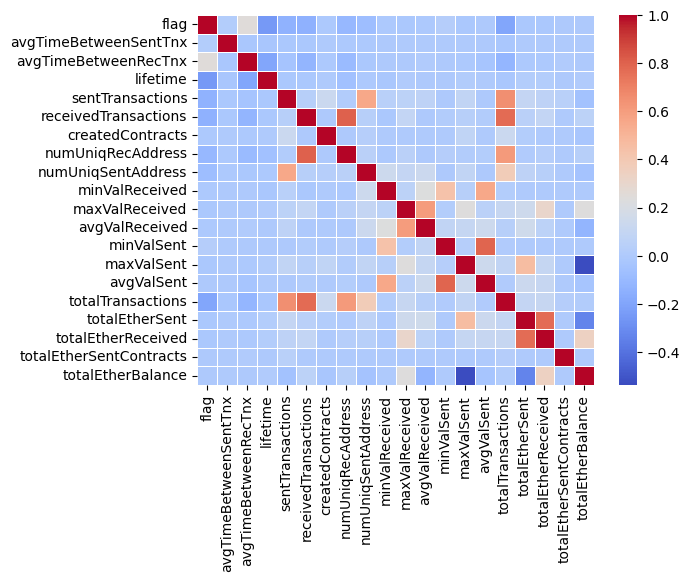

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.drop(columns='address').corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()

In [6]:
df_num_corr = correlation_matrix['flag'][1:] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with FLAG:\n{}".format(len(golden_features_list), golden_features_list))

There is 0 strongly correlated values with FLAG:
Series([], Name: flag, dtype: float64)


## Distribution of features

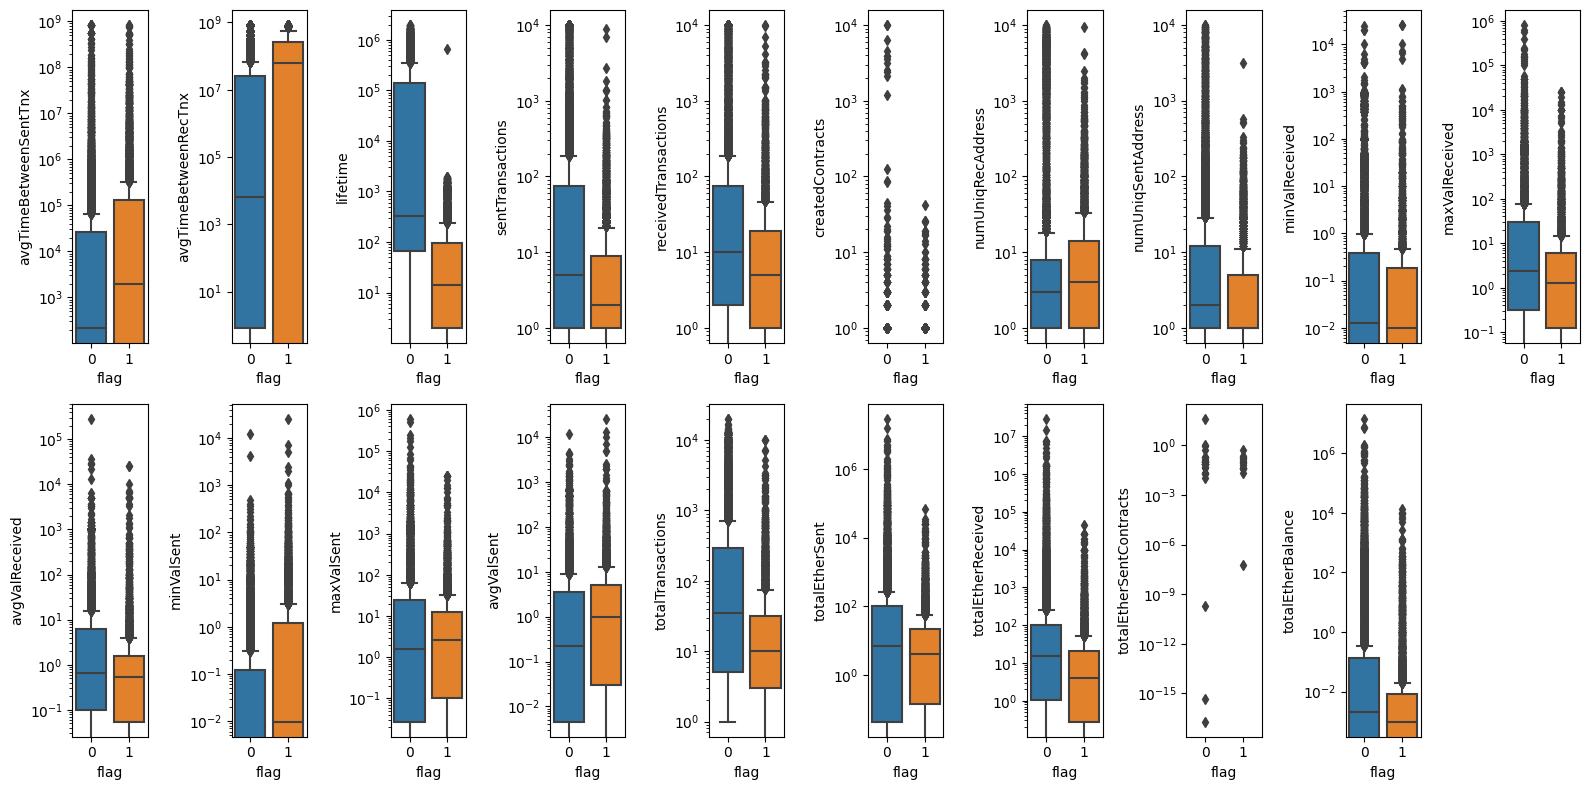

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the columns containing features
feature_columns = df.drop(columns=['address', 'flag']).columns

plt.figure(figsize=(16, 8))

# Create individual boxplots for each feature
for i, feature in enumerate(feature_columns):
    plt.subplot(2, len(feature_columns) // 2 + 1, i + 1)
    sns.boxplot(x='flag', y=feature, data=df)
    plt.yscale('log')

plt.tight_layout()
plt.show()